In [1]:
!nvidia-smi
from models.composer.generate import RNNGenerator
import numpy as np
import tensorflow as tf
from tensorflow.python.ops import array_ops
from data.preprocess import load_POP909_dataset_completor
from data.helpers.midi import MidiEventProcessor
import pretty_midi
from models.composer.helpers.utils import plot_piano_roll

configs = {
    'model_path': '/home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/test_model5',
    'vocab_size': 389,
    'emb_size': 128,
    'lstm_units': 512,
    'dense_units': 64,
    'max_timesteps': 256,
    'batch_size': 2,
    'rnn': {'num_units': 512, 'num_layers': 1, 'unit_type': 'lstm'},
}

g = RNNGenerator(configs)


TRAINING = False

/bin/bash: nvidia-smi: command not found
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(2, 256)]                0         
_________________________________________________________________
embedding (Embedding)        (2, 256, 128)             49792     
_________________________________________________________________
rnn (RNN)                    (2, 256, 512)             1312768   
_________________________________________________________________
dropout (Dropout)            (2, 256, 512)             0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (2, 256, 512)             0         
_________________________________________________________________
dense (Dense)                (2, 256, 389)             199557    
Total params: 1,562,117
Trainable params: 1,562,117
Non-trainable params: 0
___

In [2]:
DATA_PATH = '/home/richhiey/Desktop/workspace/projects/virtual_musicians/data-store/POP909-Dataset/data_process/pop909-event-token.npy'
data = np.load(DATA_PATH, allow_pickle=True)
melodies = [d['MELODY'] for d in data]
dataset = load_POP909_dataset_completor(DATA_PATH, 'MELODY', configs['batch_size'])

print(len(data))
print(dataset)

for x in dataset:
    print(x)
    break

909
<ShuffleDataset shapes: (None, 1, None), types: tf.int64>
tf.Tensor(
[[[355 352 375 ... 355 315 200]]

 [[355 355 355 ...   0   0   0]]], shape=(2, 1, 1391), dtype=int64)


In [3]:
g = RNNGenerator(configs, TRAINING)
#g.train(dataset, {'num_epochs':1, 'print_every': 3, 'save_every': 1000,})

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(1, 256)]                0         
_________________________________________________________________
embedding_1 (Embedding)      (1, 256, 128)             49792     
_________________________________________________________________
rnn_1 (RNN)                  (1, 256, 512)             1312768   
_________________________________________________________________
dropout_1 (Dropout)          (1, 256, 512)             0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (1, 256, 512)             0         
_________________________________________________________________
dense_1 (Dense)              (1, 256, 389)             199557    
Total params: 1,562,117
Trainable params: 1,562,117
Non-trainable params: 0
____________________________________________

tf.Tensor(
[[355 355 355 355 355 355 355 355 355 355 355 355 355 355 355 355 355 347
  378  71 300 374  70 257 199 299 198 370  71 300 199 371  70 280 198 276
  367  68 300 196 366  66 277 194 370  70 334 198  71 280 199  70 307 198
  364  66 281  63 256 194 355 285 191 331]], shape=(1, 64), dtype=int64)
Num of Generated Steps: 512
[355 355 355 355 355 355 355 355 355 355 355 355 355 355 355 355 355 347
 378  71 300 374  70 257 199 299 198 370  71 300 199 371  70 280 198 276
 367  68 300 196 366  66 277 194 370  70 334 198  71 280 199  70 307 198
 364  66 281  63 256 194 355 285 191 331 115 150  79  16  97  51 282 240
  53 211 285 241 281 106  44 305 215 163 300 112 347 264 249 322 225   8
  46 351 253 264  39 126 342 385 375 249 120   4 141  77 194 101 258 144
 187 148 250 195 305 101 323  41  42 229 101 227 146 219 286  40 188 104
 169 259   4 373  45 210 188 179 213  18 187 333 119 276   9 314  15 227
 343 296 220 313 257  96  99 235 254 142 333 140 240 291  30  54 386 319
 158 386 

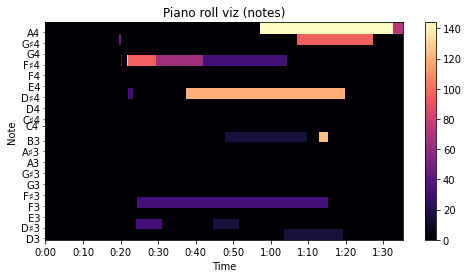

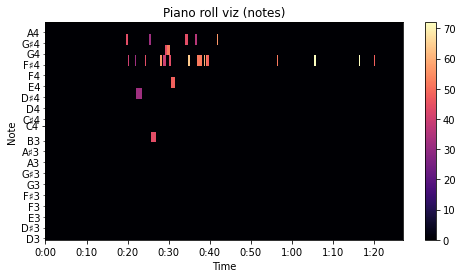

In [6]:
midi_processor = MidiEventProcessor()

def create_pm_object(notes):
    pm_outputs = pretty_midi.PrettyMIDI()
    # Create an Instrument instance for a cello instrument
    instr_prog = pretty_midi.instrument_name_to_program('Cello')
    instr = pretty_midi.Instrument(program=instr_prog)
    instr.notes = notes
    pm_outputs.instruments.append(instr)
    return pm_outputs


for x in dataset.take(6):
    start_melody = x[0,:,:64]
    continued = g.predict(start_melody, num_steps=512)
    
    generated_midi = midi_processor.decode(continued)
    outputs_pm = create_pm_object(generated_midi)
    
    inpx = x[0,0,:512].numpy()
    print(inpx)
    #kjkjd
    input_midi = midi_processor.decode(inpx)
    inputs_pm = create_pm_object(input_midi)
    
    plot_piano_roll(outputs_pm, 50, 70)
    plot_piano_roll(inputs_pm, 50, 70)

    break

In [5]:
%load_ext tensorboard
%tensorboard --logdir /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache

Reusing TensorBoard on port 6006 (pid 68846), started 0:04:41 ago. (Use '!kill 68846' to kill it.)